<a href="https://colab.research.google.com/github/vysf/machine-learning-practice/blob/master/Membuat_Model_untuk_Klasifikasi_Dua_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('citrus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.head(10000)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


Ubah kolom label menjadi numerik karena jst tidak dapat mengenali tipe data object

In [ ]:
df.name[df.name == "orange"] = 0
df.name[df.name == "grapefruit"] = 1

<ipython-input-12-0f65c475124b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == "orange"] = 0
<ipython-input-12-0f65c475124b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == "grapefruit"] = 1


Ubah dataset dari bentuk DataFrame menjadi array

In [ ]:
dataset = df.values
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

Pisahkan mana atribut dan label

In [ ]:
X = dataset[:,1:]
y = dataset[:,0]

Lakukan normalisai pada atribut agar jst dapat mepelajari model denga baik

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

Pisahkan data latih dan data uji untuk mengevaluasi kinerja model. Gunakan 30% dari seluruh data sebagai data uji

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Ubah tipe data label dari boolean (0 dan 1) menjadi numerik (desimal)

In [ ]:
import numpy as np
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Untuk model yang kita kembangkan adalah model sequential yang memiliki 3 buah layer seperti di bawah. Activation function pada 2 layer pertama yang dapat digunakan adalah relu untuk latihan ini. Anda dapat bereksplorasi menggunakan activation function lain. Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari jst kita merupakan satu buah bilangan numerik. Activation function pada layer terakhir dipilih sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1. Sigmoid sangat cocok digunakan pada masalah klasifikasi biner.

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

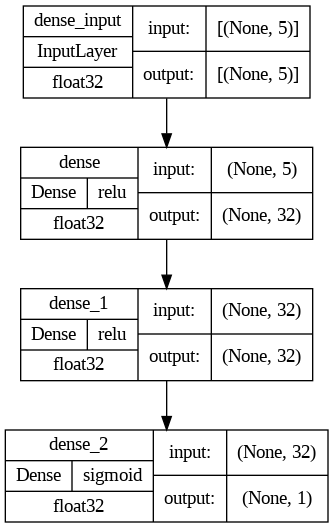

In [ ]:
from keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True
)

Tentukan optimizer dan loss function. Optimizer kita akan menggunakan stochastic gradient descent (sgd) yang merupakan optimizer yang sangat umum dan cocok dipakai pada dataset yang berukuran kecil. Dan untuk loss yang sesuai adalah ‘binary_crossentropy’ karena masalah pada latihan kita kali ini adalah masalah 2 kelas (biner). \\
Selain itu jika kita ingin menampilkan akurasi pada setiap proses pelatihan model kita dapat menambahkan parameter metrics dan mengisinya dengan string ‘accuracy’.

In [ ]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6766 - accuracy: 0.6869
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6409 - accuracy: 0.9047
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.9163
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.9224
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.9259
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.9266
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.9267
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9274
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9270
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2004 - accura

Evaluasi model dan lihat apakah model underfit atau overfit

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 1s 2ms/step - loss: 0.1814 - accuracy: 0.9297


[0.1814309060573578, 0.9296666383743286]